## Twitter Data Wrangling
Your goal: wrangle WeRateDogs Twitter data to create interesting and trustworthy analyses and visualizations. The Twitter archive is great, but it only contains very basic tweet information. Additional gathering, then assessing and cleaning is required for "Wow!"-worthy analyses and visualizations.

Specific Notes: 
- You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
- You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.

In [1]:
import requests
import pandas as pd
import io
import json
import glob
import numpy as np

## Gathering Data

- `Gathering data source 1 - image prediction`:
    Get Tweet image prediction by downloading from url programmatically

In [2]:
r = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')
r = r.content
image_predictions = pd.read_csv(io.StringIO(r.decode('utf-8')),sep='\t')
image_predictions.to_csv('image_predictions.csv')

- `Gathering data source 2 - twitter_archive_enhanced`:
    This file is given and just read from the directory

In [3]:
twitter_archive_enhanced = pd.read_csv('twitter-archive-enhanced.csv')

- `Gathering data source 3 - tweet_json`: 
    Did not chose API connection, instead directly get the tweet_json.txt file and copying the API extraction code below(below code does not run)

In [4]:
# import tweepy
# from tweepy import OAuthHandler
# import json
# from timeit import default_timer as timer

# # Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# # These are hidden to comply with Twitter's API terms and conditions
# consumer_key = 'HIDDEN'
# consumer_secret = 'HIDDEN'
# access_token = 'HIDDEN'
# access_secret = 'HIDDEN'

# auth = OAuthHandler(consumer_key, consumer_secret)
# auth.set_access_token(access_token, access_secret)

# api = tweepy.API(auth, wait_on_rate_limit=True)

# # NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# # df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# # change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# # NOTE TO REVIEWER: this student had mobile verification issues so the following
# # Twitter API code was sent to this student from a Udacity instructor
# # Tweet IDs for which to gather additional data via Twitter's API
# tweet_ids = twitter_archive_enhanced.tweet_id.values
# len(tweet_ids)

# # Query Twitter's API for JSON data for each tweet ID in the Twitter archive
# count = 0
# fails_dict = {}
# start = timer()
# # Save each tweet's returned JSON as a new line in a .txt file
# with open('tweet_json.txt', 'w') as outfile:
#     # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
#     for tweet_id in tweet_ids:
#         count += 1
#         print(str(count) + ": " + str(tweet_id))
#         try:
#             tweet = api.get_status(tweet_id, tweet_mode='extended')
#             print("Success")
#             json.dump(tweet._json, outfile)
#             outfile.write('\n')
#         except tweepy.TweepError as e:
#             print("Fail")
#             fails_dict[tweet_id] = e
#             pass
# end = timer()
# print(end - start)
# print(fails_dict)
# **/

In [5]:
# List of dictionaries to build file by file and later convert to a DataFrame
with open('tweet-json.txt', encoding='utf-8') as file:
    tweet = file.readlines()
    
dict_list = []
for l in tweet:
    line = json.loads(l)
    id_line = line['id']
    retweet = line['retweet_count']
    favorite = line['favorite_count']
    dict_list.append({'tweet_id':id_line,'retweet':retweet,'favorite':favorite})
tweet_json = pd.DataFrame(dict_list, columns = ['tweet_id','retweet', 'favorite'])

## Access data 

#### Visual Access

In [6]:
twitter_archive_enhanced.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [7]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [8]:
tweet_json.head()

,tweet_id,retweet,favorite
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


#### Programmatic Assessment

In [9]:
twitter_archive_enhanced.info()
twitter_archive_enhanced.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [10]:
image_predictions.info()
image_predictions.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [11]:
tweet_json.info()
tweet_json.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   tweet_id  2354 non-null   int64
 1   retweet   2354 non-null   int64
 2   favorite  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


,tweet_id,retweet,favorite
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


#### Make copy of data to start cleaning

In [12]:
twitter_archive_enhanced_clean = twitter_archive_enhanced.copy()
image_predictions_clean = image_predictions.copy()
tweet_json_clean = tweet_json.copy()

### Data Issue Summary

#### Quality Issue:
`twitter_archive_enhanced`:
- Has extra rows that tweet_json doesn't have, which is not useful for further analysis
- Delete unnecessary columns with lots of missing values and the retweet rows to be removed, since retweets are essentially duplicates of the actual tweets. 
- timestamp should be convert to datetime format
- None values in dog names change to unknown
- Filter tweets after 2017-08-01
- Remove incorrect ratings (ratings that are not 10 as denumerator)
- Ratings with decimal values incorrectly extracted
- Merge multiple dog stages and delete the rows with multiple stages

`image_predictions`:
- img_num change to category data type
- Deduplicate the dataset, there are duplicated rows
- Adding final prediction column, based on the logic of p1, p2, p3 prediction accuracy and confident interval


#### Tidyness Issue:
- Dog stage columns are not useable and need to be transformed into other formart(use pd.melt)
- Merge three datasets
- Delete unnecessary columns

### Quality Issue

#### 1. Missing data
It seems the number of records in those three datasets are different. Since we cannot find another source to add more data into the dataset, so this step we'll focus on deleting the extra data to make sure our dataset has 2073 records(same as file tweet_json), also this is the dataset for all tweets with images.

#### Code

In [13]:
twitter_archive_enhanced_clean = twitter_archive_enhanced_clean[twitter_archive_enhanced_clean['tweet_id'].isin(tweet_json_clean['tweet_id'])]
image_predictions_clean =  image_predictions_clean[image_predictions_clean['tweet_id'].isin(tweet_json_clean['tweet_id'])]


#### Test

In [14]:
len(twitter_archive_enhanced_clean)

2354

In [15]:
len(image_predictions_clean)

2073

In [16]:
len(image_predictions_clean)

2073

#### 2. Delete unnecessary columns with lots of missing values  and retweet rows
The retweet rows to be removed, since retweets are essentially duplicates of the actual tweets. 

#### Code

In [17]:
twitter_archive_enhanced_clean = twitter_archive_enhanced_clean[~((twitter_archive_enhanced_clean['retweeted_status_id'].isnull() == False) |
                                                                 (twitter_archive_enhanced_clean['retweeted_status_user_id'].isnull() == False) | 
                                                                  (twitter_archive_enhanced_clean['retweeted_status_timestamp'].isnull() == False))]
twitter_archive_enhanced_clean.head()
column_to_delete = ['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp']
twitter_archive_enhanced_clean = twitter_archive_enhanced_clean.drop(column_to_delete,axis=1)


#### Test

In [18]:
twitter_archive_enhanced_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo'],
      dtype='object')

#### 3. timestamp should be convert to datetime format

#### Code

In [19]:
twitter_archive_enhanced_clean['timestamp'] = pd.to_datetime(twitter_archive_enhanced_clean['timestamp'] )

#### Test

In [20]:
twitter_archive_enhanced_clean.dtypes

tweet_id                            int64
timestamp             datetime64[ns, UTC]
source                             object
text                               object
expanded_urls                      object
rating_numerator                    int64
rating_denominator                  int64
name                               object
doggo                              object
floofer                            object
pupper                             object
puppo                              object
dtype: object

#### 4. None values in dog names change to unknown
This step for better readability

#### Code

In [21]:
twitter_archive_enhanced_clean['name'] = twitter_archive_enhanced_clean['name'].str.replace('None','Unknown')

#### Test

In [22]:
twitter_archive_enhanced_clean.name.value_counts()

Unknown    680
a           55
Charlie     11
Lucy        11
Oliver      10
          ... 
Tom          1
Dex          1
Cheryl       1
Zuzu         1
Lassie       1
Name: name, Length: 956, dtype: int64

#### 5. Filter tweets after 2017-08-01

#### Code

In [23]:
twitter_archive_enhanced_clean = twitter_archive_enhanced_clean[(twitter_archive_enhanced_clean['timestamp'] <= '2017-08-01')]


#### Test

In [24]:
twitter_archive_enhanced_clean['timestamp'].sort_values(ascending = False)

2      2017-07-31 00:18:03+00:00
3      2017-07-30 15:58:51+00:00
4      2017-07-29 16:00:24+00:00
5      2017-07-29 00:08:17+00:00
6      2017-07-28 16:27:12+00:00
                  ...           
2351   2015-11-16 00:24:50+00:00
2352   2015-11-16 00:04:52+00:00
2353   2015-11-15 23:21:54+00:00
2354   2015-11-15 23:05:30+00:00
2355   2015-11-15 22:32:08+00:00
Name: timestamp, Length: 2173, dtype: datetime64[ns, UTC]

#### 6. Remove incorrect ratings (ratings that are not 10 as denumerator)

#### Code

In [25]:
twitter_archive_enhanced_clean = twitter_archive_enhanced_clean[twitter_archive_enhanced_clean['rating_denominator'] == 10]


#### Test

In [26]:
twitter_archive_enhanced_clean['rating_denominator'].value_counts()

10    2151
Name: rating_denominator, dtype: int64

#### 7. Ratings with decimal values incorrectly extracted

Try to capture the entire value from the text instead

#### Code

In [27]:
ratings = twitter_archive_enhanced_clean.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)
twitter_archive_enhanced_clean.rating_numerator = ratings

#### Test

In [28]:
twitter_archive_enhanced_clean[twitter_archive_enhanced_clean['tweet_id'] == 786709082849828864]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
695,786709082849828864,2016-10-13 23:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,9.75,10,Logan,None,None,None,None


In [29]:
twitter_archive_enhanced_clean['rating_numerator'].value_counts()

12       500
10       442
11       425
13       305
9        155
8         98
7         52
14        43
5         34
6         32
3         19
4         15
2          9
1          7
420        2
0          2
666        1
13.5       1
1776       1
11.26      1
182        1
9.75       1
15         1
9.5        1
17         1
007        1
11.27      1
Name: rating_numerator, dtype: int64

#### 8. Merge multiple dog stages and delete the rows with multiple stages
There are 14 records with multiple dog stages, find them and delete

#### Code 

In [30]:
columns = ['doggo','floofer','pupper','puppo']
twitter_archive_enhanced_clean[columns] = twitter_archive_enhanced_clean[columns].apply(lambda x: x.replace('None', ''))
twitter_archive_enhanced_clean[columns] = twitter_archive_enhanced_clean[columns].apply(lambda x: x.replace(np.NaN, ''))
twitter_archive_enhanced_clean['stage_concat'] = twitter_archive_enhanced_clean['doggo'] + twitter_archive_enhanced_clean['floofer'] + twitter_archive_enhanced_clean['pupper'] + twitter_archive_enhanced_clean['puppo']
twitter_archive_enhanced_clean.loc[twitter_archive_enhanced_clean.stage_concat == 'doggopupper', 'stage_concat'] = 'doggo, pupper'
twitter_archive_enhanced_clean.loc[twitter_archive_enhanced_clean.stage_concat == 'doggopuppo', 'stage_concat'] = 'doggo, puppo'
twitter_archive_enhanced_clean.loc[twitter_archive_enhanced_clean.stage_concat == 'doggofloofer', 'stage_concat'] = 'doggo, floofer'
twitter_archive_enhanced_clean = twitter_archive_enhanced_clean[~twitter_archive_enhanced_clean['stage_concat'].isin(['doggo, pupper','doggo, floofer','doggo, puppo'])]



#### Test

In [31]:
twitter_archive_enhanced_clean['stage_concat'].value_counts()

           1807
pupper      224
doggo        75
puppo        24
floofer       9
Name: stage_concat, dtype: int64

In [32]:
twitter_archive_enhanced_clean.groupby(["doggo", "floofer", "pupper", "puppo"]).size().reset_index().rename(columns={0: "count"})

,doggo,floofer,pupper,puppo,count
0,,,,,1807
1,,,,puppo,24
2,,,pupper,,224
3,,floofer,,,9
4,doggo,,,,75


#### 9. img_num change to category data type

#### Code

In [33]:
image_predictions_clean['img_num'] = image_predictions_clean['img_num'].astype('category')

#### Test

In [34]:
image_predictions_clean.dtypes

tweet_id       int64
jpg_url       object
img_num     category
p1            object
p1_conf      float64
p1_dog          bool
p2            object
p2_conf      float64
p2_dog          bool
p3            object
p3_conf      float64
p3_dog          bool
dtype: object

#### 10. Deduplicate image_predictions dataset, there are duplicated rows

#### Code

In [35]:
image_predictions_clean = image_predictions_clean.drop_duplicates()


#### Test

In [36]:
image_predictions_clean.duplicated().sum()

0

#### 11. Adding final prediction column
Adding final prediction column, based on the logic of p1, p2, p3 prediction accuracy and confident interval

#### Code

In [37]:
def define_final_pred(df):
    res = pd.DataFrame()
    for index, row in df.iterrows():
        if row['p1_dog'] == True:
            row['final_pred'] = row['p1']
        elif row['p2_dog'] == True:
            row['final_pred'] = row['p2']
        elif row['p3_dog'] == True:
            row['final_pred'] = row['p3']
        else:
            row['final_pred'] = 'Unknown' 
#         print(row)
        res = res.append(row)
#         print(res)
    return res


In [38]:
image_predictions_clean = define_final_pred(image_predictions_clean)

#### Test

In [39]:
image_predictions_clean.head()

,final_pred,img_num,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,tweet_id
0,Welsh_springer_spaniel,1.0,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,0.465074,1.0,collie,0.156665,1.0,Shetland_sheepdog,0.061428,1.0,6.660209e+17
1,redbone,1.0,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826,1.0,miniature_pinscher,0.074192,1.0,Rhodesian_ridgeback,0.072010,1.0,6.660293e+17
2,German_shepherd,1.0,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,0.596461,1.0,malinois,0.138584,1.0,bloodhound,0.116197,1.0,6.660334e+17
3,Rhodesian_ridgeback,1.0,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback,0.408143,1.0,redbone,0.360687,1.0,miniature_pinscher,0.222752,1.0,6.660442e+17
4,miniature_pinscher,1.0,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher,0.560311,1.0,Rottweiler,0.243682,1.0,Doberman,0.154629,1.0,6.660492e+17


### Tideness Issue

#### 1. Dog stage transform
We'll need to transform the dog stage into one column stage instead of 4 column which is not usable at all

#### Code

In [40]:
twitter_archive_enhanced_clean = pd.melt(twitter_archive_enhanced_clean,
                                        id_vars=['tweet_id', 'timestamp',
       'source', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name',],
                                    var_name='stage',value_name='stage_value')
twitter_archive_enhanced_clean = twitter_archive_enhanced_clean.drop('stage',axis=1).drop_duplicates()



#### Test

In [41]:
twitter_archive_enhanced_clean.tail()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage_value
7174,752519690950500352,2016-07-11 15:07:30+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Hopefully this puppo on a swing will help get ...,https://twitter.com/dog_rates/status/752519690...,11,10,Unknown,puppo
7186,751132876104687617,2016-07-07 19:16:47+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Cooper. He's just so damn happy. 10/10...,https://twitter.com/dog_rates/status/751132876...,10,10,Cooper,puppo
7258,744995568523612160,2016-06-20 20:49:19+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Abby. She got her face stuck in a glas...,https://twitter.com/dog_rates/status/744995568...,9,10,Abby,puppo
7270,743253157753532416,2016-06-16 01:25:36+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Kilo. He cannot reach the snackum. Nif...,https://twitter.com/dog_rates/status/743253157...,10,10,Kilo,puppo
7303,738537504001953792,2016-06-03 01:07:16+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Bayley. She fell asleep trying to esca...,https://twitter.com/dog_rates/status/738537504...,11,10,Bayley,puppo


#### 2. Merge three datasets to get full information in one data view

#### Code

In [42]:
data = pd.merge(tweet_json, twitter_archive_enhanced_clean, on='tweet_id', how='inner')
result = pd.merge(data, image_predictions_clean, on='tweet_id', how='inner')

#### Test

In [43]:
result.head()

,tweet_id,retweet,favorite,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,891815181378084864,4328,25461,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,...,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,1.0,malamute,0.078253,1.0,kelpie,0.031379,1.0
1,891689557279858688,8964,42908,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,...,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,paper_towel,0.170278,0.0,Labrador_retriever,0.168086,1.0,spatula,0.040836,0.0
2,891327558926688256,9774,41048,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,...,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712,1.0,English_springer,0.225770,1.0,German_short-haired_pointer,0.175219,1.0
3,891087950875897856,3261,20562,2017-07-29 00:08:17+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,Unknown,...,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,Chesapeake_Bay_retriever,0.425595,1.0,Irish_terrier,0.116317,1.0,Indian_elephant,0.076902,0.0
4,890729181411237888,16716,56848,2017-07-28 00:22:40+00:00,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,Unknown,...,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,Pomeranian,0.566142,1.0,Eskimo_dog,0.178406,1.0,Pembroke,0.076507,1.0


#### 3. Delete columns that are unnecessary for analysis
For this analysis, source, expanded_urls are not necessary so deleting those columns.

#### Code

In [44]:
result = result.drop(['source','expanded_urls'],axis=1)


In [52]:
result['rating_numerator'] = result['rating_numerator'].astype(float)
result.to_csv("twitter_archive_master.csv",index=False)

#### Test

In [53]:
result.head()

,tweet_id,retweet,favorite,timestamp,text,rating_numerator,rating_denominator,name,stage_value,final_pred,...,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,891815181378084864,4328,25461,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,12.0,10,Archie,,Chihuahua,...,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,1.0,malamute,0.078253,1.0,kelpie,0.031379,1.0
1,891689557279858688,8964,42908,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,13.0,10,Darla,,Labrador_retriever,...,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,paper_towel,0.170278,0.0,Labrador_retriever,0.168086,1.0,spatula,0.040836,0.0
2,891327558926688256,9774,41048,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,12.0,10,Franklin,,basset,...,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712,1.0,English_springer,0.225770,1.0,German_short-haired_pointer,0.175219,1.0
3,891087950875897856,3261,20562,2017-07-29 00:08:17+00:00,Here we have a majestic great white breaching ...,13.0,10,Unknown,,Chesapeake_Bay_retriever,...,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,Chesapeake_Bay_retriever,0.425595,1.0,Irish_terrier,0.116317,1.0,Indian_elephant,0.076902,0.0
4,890729181411237888,16716,56848,2017-07-28 00:22:40+00:00,When you watch your owner call another dog a g...,13.0,10,Unknown,,Pomeranian,...,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,Pomeranian,0.566142,1.0,Eskimo_dog,0.178406,1.0,Pembroke,0.076507,1.0


## Insights and Analysis

### Insight 1. Which dog type receive most retweet and favorites

From the data we can conclude: Bedlington Terrier received the most retweet and favorites.

In [54]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb

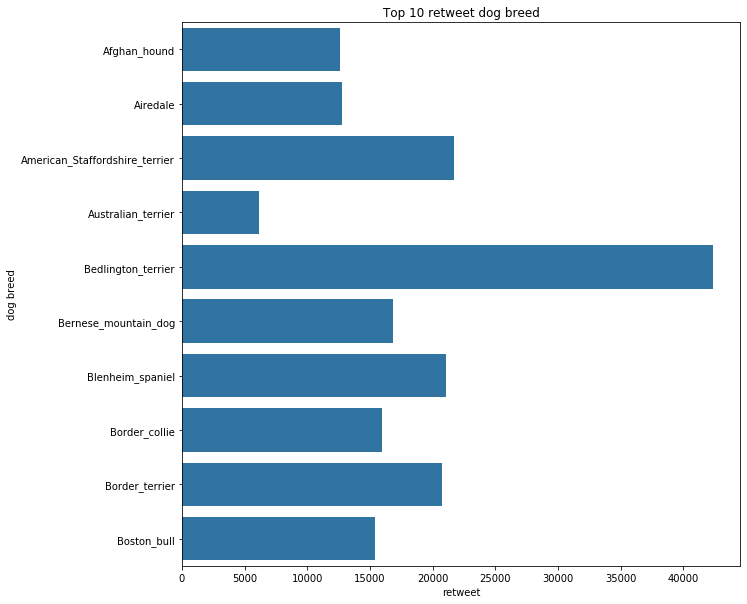

In [55]:
g = result.groupby(['final_pred']).sum().reset_index().head(10)
plt.figure(figsize=(10,10))
base_color = sb.color_palette()[0]
ax = sb.barplot(data = g, y = 'final_pred', x = 'retweet',color = base_color)
y = plt.ylabel('dog breed')
title = plt.title('Top 10 retweet dog breed')

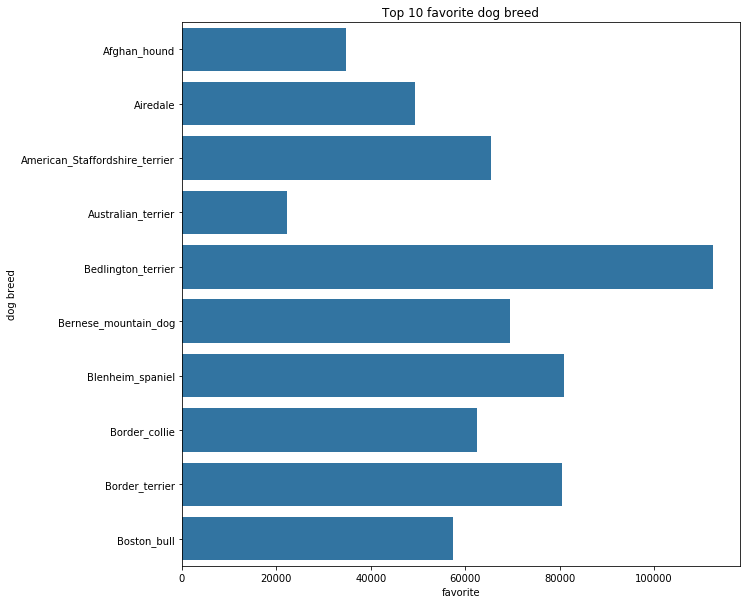

In [56]:
plt.figure(figsize=(10,10))
base_color = sb.color_palette()[0]
ax = sb.barplot(data = g, y = 'final_pred', x = 'favorite',color = base_color)
y = plt.ylabel('dog breed')
title = plt.title('Top 10 favorite dog breed')

### Insight 2. Which dog type receive the highest average rating
From the data we can conclude: Border Terrier receive the highest average rating

In [58]:
r = result.groupby(['final_pred']).mean().reset_index().head(10)

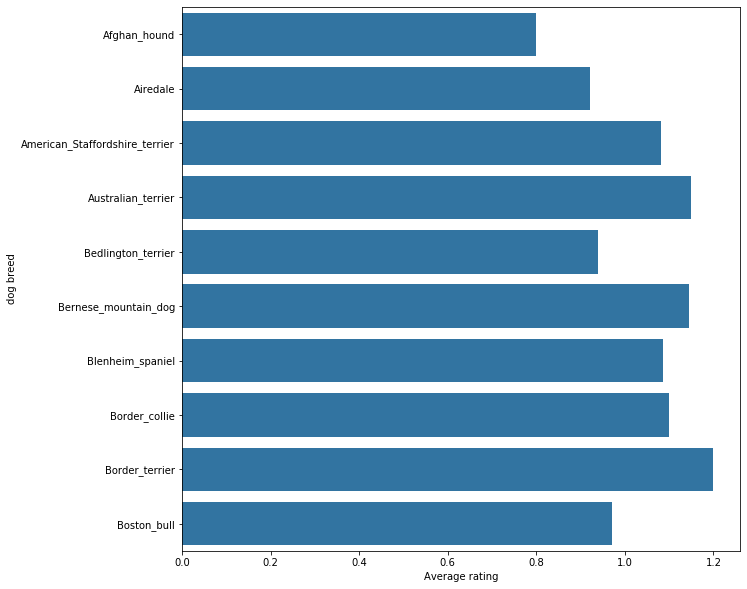

In [59]:

plt.figure(figsize=(10,10))
base_color = sb.color_palette()[0]
ax = sb.barplot(data = r, y = 'final_pred', x = r['rating_numerator']/r["rating_denominator"],color = base_color)
y = plt.ylabel('dog breed')
x = plt.xlabel('Average rating')

### Insights 3: Year over year average rating for top 10 favorite dog breed
From the data we can conclude: for the top 10 favorite dog breed, the ratings has an increase trend from 2015 to 2017. This may indicate this twitter account receives more popularity that has more data/ratings(need more info to validate).

In [60]:
top_10_breed = result.groupby(['final_pred']).mean().reset_index().head(10)['final_pred']
result = result[result['final_pred'].isin(top_10_breed)]
result['timestamp'] = pd.to_datetime(result['timestamp'])
d = result.groupby(result['timestamp'].dt.year).mean().reset_index()

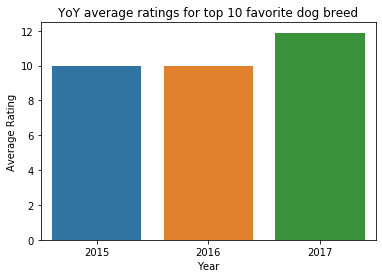

In [61]:
ax = sb.barplot(y='rating_numerator',x='timestamp',data=d)
y = plt.ylabel('Average Rating')
x = plt.xlabel('Year')
title = plt.title('YoY average ratings for top 10 favorite dog breed')